# k-Nearest Neighbors

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#### Read data

In [17]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

#### X and y arrays

In [18]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

#### Training 

Using GridSearchCV to find the best hyperparameters

In [20]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, verbose=3, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.58778237        nan 0.58027836        nan 0.59770426
        nan 0.58775923        nan 0.59709402        nan 0.59064294
        nan 0.59375943        nan 0.5882176 ]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

Inspect the best parameters

In [21]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Get the best estimator

In [22]:
model = grid_search.best_estimator_

Get the predictions using the trained model

In [23]:
predictions = model.predict(X_test)

#### Model Evaluation

Classification report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     32931
           1       0.71      0.52      0.60      9306

    accuracy                           0.85     42237
   macro avg       0.79      0.73      0.75     42237
weighted avg       0.84      0.85      0.84     42237



Confusion Matrix

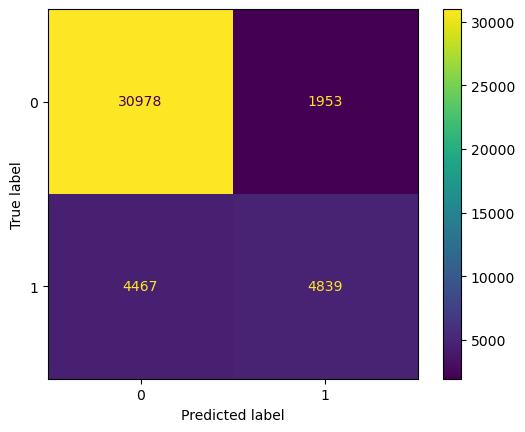

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()